# Выявление параметров, определяющих успешность компьютерных игр

**Учебная работа. Самостоятельный исследовательский проект в рамках курса "Аналитик данных" Яндекс.Практикума  
Спринт 5. Сборный проект №1.**

## Общая информация о проекте
### Описание задания
Доступны данные продажах игр, оценках пользователей и экспертов, жанрах и платформе до 2016 года. Интернет-магазину нужно спланировать кампанию на 2017 год, для этого нужно сделать прогноз, какой продукт имеет больший потенциал, и как лучше спланировать рекламную кампанию.

###  Цель
Изучить и проанализивароть данные о продажах игр, оценках пользователей и экспертов, жанрах и платформе, и выяснить, какие закономерности определяют успешность игры на рынке.

###  Задачи
1. Подготовить данные: найти и удалить дублирующиеся данные, найти и обработать пропущенные значения, найти и исправить ошибки в данных.
2. Рассчитать суммарные продажи во всех регионах.
3. Провести исследовательский анализ данных.
    - Изучить, сколько игр выпускалось в разные годы
    - Изучить, как менялись продажи по платформам, изучить распределение продаж по годам для наиболее популярных платформ. Определить характерный срок жизни (популярности) платформ.
    - Определить начало актуального периода и проанализировать данные о популярности платформ в актуальном периоде. 
    - Определить потенциально прибыльные платформы.
    - Построить и описать график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
    - Изучить связь отзывов пользователей и критиков и продаж внутри одной популярной платформы, сравнить выводы с продажами на других платформах.
    - Изучить общее распределение игр по жанрам, самые прибыльных жанрах, жанры с высокими и низкими продажами.
4. Составить портрет пользователя каждого региона (NA, EU, JP).
5. Проверить гипотезы:

5. Описать и оформить результаты.

### Гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

###  Данные
Архив объявлений о продаже квартир получен в виде файла games.csv.

###  Описание данных
  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

## Загрузка и обзор данных

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

Создаём библиотеку стилей:

In [2]:
class Color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Загружаем файл с данными:

In [3]:
data = pd.read_csv('/datasets/games.csv')

Просмотрим информацию о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк, не во всех строках заполнены название игры, год выпуска, жанр, оценка критиков, пользователей и рейтинг ESRB.  
Нужно изменить регистр в названиях столбцов на нижний.   
Нужно изменить типы данных для столбцов:  
- `Year_of_Release` изменить с `float64` на `datetime`  
- `User_Score` изменить с `object` на `float64`   

Неправильный тип данных в столбцах не везде это позволяет, но попробуем поспотреть, есть ли странные и выбивающиеся значения:

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выглядит, как будто всё в порядке, но стоит проверить более внимательно каждый столбец отдельно (в том числе и те, которые не были выведены из-за неправильного типа данных).

### Вывод
После первого знакомства с данными можно сказать о том, что:  
- в данных есть пропусков (по крайней мере в 6 столбцах из 11). Нужно изучить их и попытаться выявить причину их возникновения, а там, где это возможно, заполнить.  
- в двух столбцах неправильно определился тип данных, его нужно исправить.  

## Предобработка и знакомство с данными
Проверим, есть ли в таблице полностью дублирующиеся строки.

In [6]:
print('Дублирующихся строк:', data.duplicated().sum())

Дублирующихся строк: 0


Изменим регистр в названиях столбцов.

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Для первичного знакомства с данными в столбце используем функцию `column_details`.

In [8]:
def column_details(data, column, bins, rows):
    """Функция для первичного знакомства с данными в столбце.
    Выводит название столбца, тип данных, описательную статистику, процент пропущенных значений, 
    количество уникальных значений, частотную гистограмму.
    Принимает аргументы:
        - название таблицы;
        - название столбца;
        - количество корзин для гистограммы
        - количество уникальных значений, которое нужно распечатать"""
    
    """Создаём библиотеку стилей"""
    class Color:
       PURPLE = '\033[95m'
       CYAN = '\033[96m'
       DARKCYAN = '\033[36m'
       BLUE = '\033[94m'
       GREEN = '\033[92m'
       YELLOW = '\033[93m'
       RED = '\033[91m'
       BOLD = '\033[1m'
       UNDERLINE = '\033[4m'
       END = '\033[0m'    
    
    """Печатаем название столбца"""
    print(Color.BOLD + Color.UNDERLINE + 'Изучение данных в столбце ' + column + Color.END)
    print()
    
    """Печатаем тип данных в столбце"""
    dtype = data[column].dtypes
    print('{: <25}'.format('Тип данных:'), dtype)

    """Считаем  и выводим количество и процент пропущенных значений"""
    na_count = data[column].isna().sum()
    print('{: <25}'.format('Пропущенных значений:'), na_count)    
    
    lenth = len(data)
    na_part = na_count / lenth
    print('{: <25}'.format('Пропущенных значений:'), na_part)   
        
    """Считаем количество повторяющихся значений"""
    duplicated = data[column].duplicated().sum()
    print('{: <25}'.format('Повторяющихся значений:'), duplicated)   
    
    """Считаем количество уникальных значений"""
    unique = len(data[column].unique())
    print('{: <25}'.format('Уникальных значений:'), unique)   
    print()
    
    """В зависимости от типа данных выводим информацию о столбце"""
    
    if dtype == 'int64' or dtype == 'float64':
        """Если столбец содержит числовые данные, печатаем графики и описательную статистику""" 
        
        """Выводим описательную статистику по столбцу"""
        print(Color.BOLD + Color.BLUE + 'Описательная статистика' + Color.END)
        print()
        print(data[column].describe())
        print()           
        
        """Выводим частотную гистограмму"""
        min = data[column].min()
        max = data[column].max()
        title = 'Распределение значений столбца ' + column
        data[column].hist(bins=bins, range = (min, max))        
        plt.title(title)
        plt.show()

        """Выводим диаграмму размаха"""
        title = 'Диаграмма размаха значений столбца ' + column
        data.boxplot(column=column)
        plt.title(title)
        plt.show()
    
    elif dtype == bool or dtype == 'object':
        """Если столбец имеет тип bool, печатаем сколько строк имеет значение True и False,
        для типа object количество для каждого из уникальных значений"""
        
        print(Color.BOLD + Color.BLUE + 'Уникальные значения:' + Color.END)
        print(data[column].value_counts().head(rows))
    
    elif dtype == 'datetime64[ns]':
        """Если столбец имеет тип datetime, печатаем дату и время 
        первой и последней записи и строим частотную гистограмму"""
        print('Первая запись:', data[column].min())
        print('Последняя запись:', data[column].max())
        
        """Выводим частотную гистограмму"""
        min = data[column].min()
        max = data[column].max()
        title = 'Распределение значений столбца ' + column
        data[column].hist(bins=bins, range = (min, max))
        plt.title(title)
        plt.show()

### Информация о столбце "Название"

Применим функцию к столбцу `name`.

In [9]:
column_details(data, 'name', 50, 5)

Изучение данных в столбце name

Тип данных:               object
Пропущенных значений:     2
Пропущенных значений:     0.00011965300628178283
Повторяющихся значений:   5155
Уникальных значений:      11560

Уникальные значения:
Need for Speed: Most Wanted    12
Madden NFL 07                   9
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Name: name, dtype: int64


Пропущеных значений всего два. Возможно, их получится восстановить по другим данным (или оставить NA, если не получится). Повторяющиеся значения составляют около трети всех данных. Скорее всего, это разные версии игр (разные годы выпуска, например), но это нужно проверить.

Посмотрим на пропущенные значения:

In [10]:
display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Про эти две игры известна платформа, год выпуска и продажи в разных регионах, но неизвестен жанр. Игры довольно старые, возможно пропуск в названии не сохранился из-за этого.    
Посмотрим, много ли других записей про игры на платформе GEN выпуска 1993 года.

In [11]:
display(data.loc[(data.loc[:, 'platform'] == 'GEN') & (data.loc[:, 'year_of_release'] == 1993)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По другим записям восстановить название игр не получится, но строки можно оставить NA, они могут пригодиться для анализа количества продаж в разных регионах.  

Посмотрим на повторяющиеся значения названий игры, чтобы определить, не являются ли они дубликатами. Посмотрим, например, на игру `Need for Speed: Most Wanted` (игра с наибольшим количеством записей).

In [12]:
display(data.loc[data.loc[:, 'name'] == 'Need for Speed: Most Wanted'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Это, действительно, игры, выпущенные на разных платформах и в разные годы. В целом, с данными в столбце всё в порядке.

### Информация о столбце "Платформа"

In [13]:
column_details(data, 'platform', 50, 10)

Изучение данных в столбце platform

Тип данных:               object
Пропущенных значений:     0
Пропущенных значений:     0.0
Повторяющихся значений:   16684
Уникальных значений:      31

Уникальные значения:
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64


Со столбцом `platform` всё в порядке.  
Всего есть данные о 31 платформе, из них некоторые более успешные (выпустили более тысячи игр), а некоторые - менее (выпустили единичные игры или менее десятка).

### Информация о столбце "Год выпуска"

Изучение данных в столбце year_of_release

Тип данных:               float64
Пропущенных значений:     269
Пропущенных значений:     0.01609332934489979
Повторяющихся значений:   16677
Уникальных значений:      38

Описательная статистика

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64



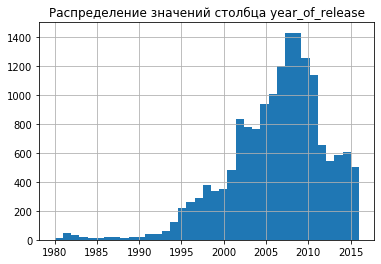

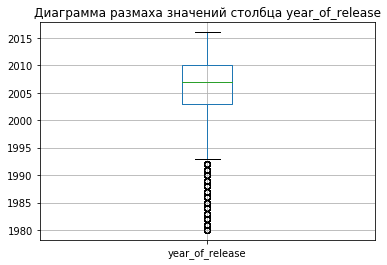

In [14]:
column_details(data, 'year_of_release', 37, 5)

Пропущенных значений довольно много, 269.  
Распределение отличается от нормального, скошено влево. По графику видно, что компьютерные игры начали бурно развиваться примерно в 1993 году, пик популярности приходится примерно на 2004-2011 годы, и до момента выгрузки данных наблюдается средний уровень популярности. До 1993 года выпускались единичные игры, которые вряд ли имеет смысл учитывать в анализе и прогнозировании трендов в настоящее время.

Посмотрим на строки с пропущенными значениями:

In [15]:
display(data.loc[data['year_of_release'].isna()].head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Если игры были выпущены достаточно давно (когда нам не так важно знать год выпуска точно, достаточно периода), то можно восстановить год выпуска по данным о платфоме.  
Посмотрим на годы существования платформ. Для этого сделаем сводную таблицу, в которой для каждой платформы будут показаны минимальные, средние, медианнные и максимальные значения года выпуска.

In [16]:
data_pivot_years_platform = data.pivot_table(
    index = 'platform',
    values = 'year_of_release',
    aggfunc = ['min', 'max']
)
data_pivot_years_platform.columns = ['min', 'max']
data_pivot_years_platform['delta'] = data_pivot_years_platform[
    'max'] - data_pivot_years_platform['min']
display(data_pivot_years_platform.sort_values(by='delta', ascending=False).head())

,min,max,delta
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0


Кроме первых трёх строк, платформы не живут дольше 10-11 лет, то есть период, в котором точность данных для нас принципиальна, это примерно с 2005 по 2016 год. Для платформ, которые перестали выпускать новые игры раньше 2005 года, мы вполне можем запонить пропуски в годе выпуска медианой по платформе. Таким же образом можно заполнить пропуски для тех платформ, которые работали короткое время (год-два).

In [17]:
print('Пропусков в столбце year_of_release до заполнения медианой:', data['year_of_release'].isnull().sum())

for name, data_grouped in data.groupby('platform'):
    max_year = data_grouped['year_of_release'].max()
    min_year = data_grouped['year_of_release'].min()
    delta = max_year - min_year
    
    if max_year < 2005 or delta < 3:
        median_year = data_grouped['year_of_release'].median()
        data.loc[data['platform'] == name, 'year_of_release'] = data['year_of_release'].fillna(median_year)

print('Пропусков в столбце year_of_release после заполнения медианой:', data['year_of_release'].isnull().sum())

Пропусков в столбце year_of_release до заполнения медианой: 269
Пропусков в столбце year_of_release после заполнения медианой: 241


Удалось заполнить всего 28 пропусков, но это уже хорошо. Заполняя оставшиеся пропуски мы рискуем ошибиться в отнесении игры к актуальному временному интервалу, так что лучше будет оставить пропуски, как есть.



### Информация о столбце "Жанр"

In [18]:
column_details(data, 'genre', 50, 13)

Изучение данных в столбце genre

Тип данных:               object
Пропущенных значений:     2
Пропущенных значений:     0.00011965300628178283
Повторяющихся значений:   16702
Уникальных значений:      13

Уникальные значения:
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


Пропущенных значения есть всего в двух строках, мы их уже видели раньше (в этих же строках нет информации о названии игры). Эти строки с равным успехом можно удалить или оставить, это не сильно повлияет на точность анализа. Так как в них содержится некорая информация о продажах в разных регионах, оставим их.

Хотя дубликатов, связанных с регистром на первый взгляд не видно, во избежание ошибок, изменим регистр на нижний.

In [19]:
data['genre'] = data['genre'].str.lower()
print(data['genre'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]




### Информация о столбце "Продажи в Северной Америке"

Изучение данных в столбце na_sales

Тип данных:               float64
Пропущенных значений:     0
Пропущенных значений:     0.0
Повторяющихся значений:   16313
Уникальных значений:      402

Описательная статистика

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64



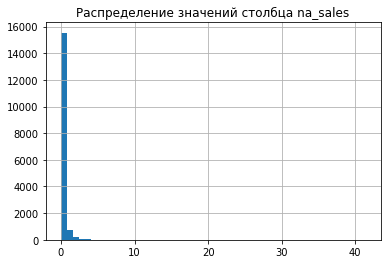

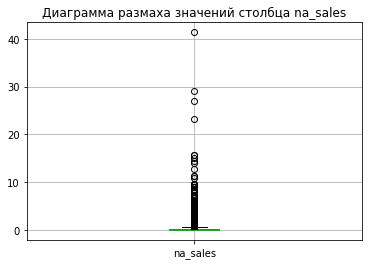

In [20]:
column_details(data, 'na_sales', 50, 5)

Пропусков нет.  
Распределение напоминает гамма-распределение. Большую часть игр вообще не покупали в Северной Америке (`na_sales=0`), достаточно большое количество игр покупали мало, и только некоторые игры покупали очень много. 

Посмотрим на те игры, которые покупали много, и убедимся, что это не выбросы:

In [21]:
display(data.sort_values(by='na_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Да, это, действительно, самые известные и популярные игры, лидеры продаж.

### Информация о столбце "Продажи в Европе"

Изучение данных в столбце eu_sales

Тип данных:               float64
Пропущенных значений:     0
Пропущенных значений:     0.0
Повторяющихся значений:   16408
Уникальных значений:      307

Описательная статистика

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64



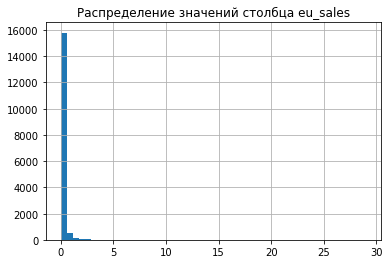

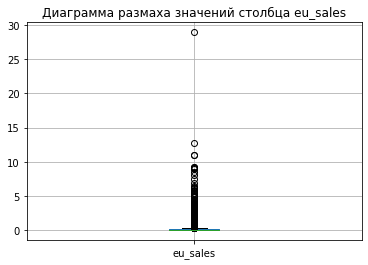

In [22]:
column_details(data, 'eu_sales', 50, 5)

Картина аналогична тому, что мы видели в Северной Америке. Посмотрим, какие игры наиболее популярны в Европе:

In [23]:
display(data.sort_values(by='eu_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,misc,4.74,9.20,4.16,2.04,77.0,7.9,E


Первая пятёрка отличается не сильно. С данными по продажам в Европе всё в порядке.

### Информация о столбце "Продажи в Японии"

Изучение данных в столбце jp_sales

Тип данных:               float64
Пропущенных значений:     0
Пропущенных значений:     0.0
Повторяющихся значений:   16471
Уникальных значений:      244

Описательная статистика

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64



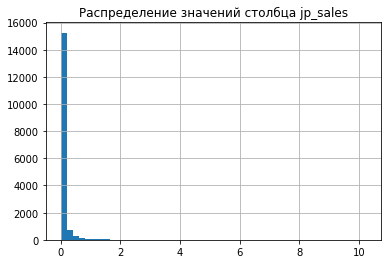

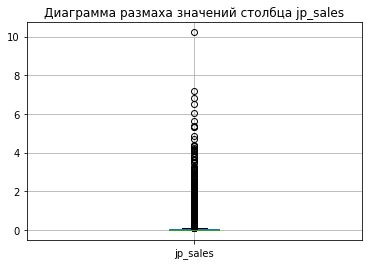

In [24]:
column_details(data, 'jp_sales', 50, 5)

Аналогичная картина. Посмотрим на первую пятёрку игр в Японии:

In [25]:
display(data.sort_values(by='jp_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN


Здесь тоже популярны игры про Марио, но первые места занимает не "Wii Sports", а  Покемоны. 

А с данными всё в порядке.



### Информация о столбце "Продажи в других странах"

Изучение данных в столбце other_sales

Тип данных:               float64
Пропущенных значений:     0
Пропущенных значений:     0.0
Повторяющихся значений:   16560
Уникальных значений:      155

Описательная статистика

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64



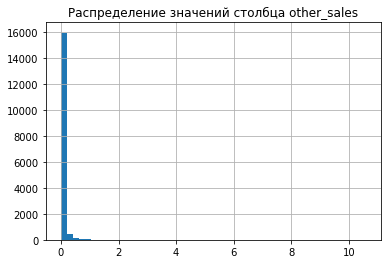

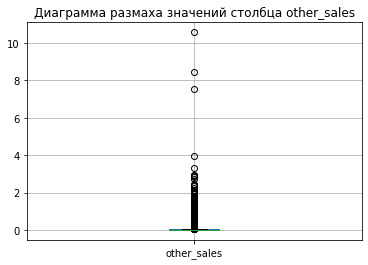

In [26]:
column_details(data, 'other_sales', 50, 5)

In [27]:
display(data.sort_values(by='other_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,action,9.43,0.40,0.41,10.57,95.0,9,M
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
48,Gran Turismo 4,PS2,2004.0,racing,3.01,0.01,1.10,7.53,89.0,8.5,E
16,Grand Theft Auto V,PS3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E


С данными всё в порядке.



### Информация о столбце "Оценка критиков"

Изучение данных в столбце critic_score

Тип данных:               float64
Пропущенных значений:     8578
Пропущенных значений:     0.5131917439425665
Повторяющихся значений:   16632
Уникальных значений:      83

Описательная статистика

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64



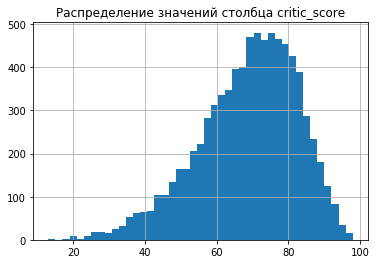

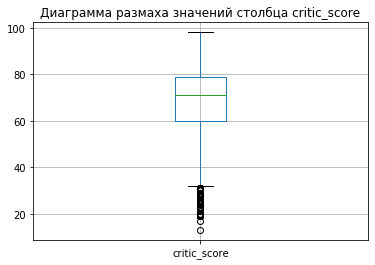

In [28]:
column_details(data, 'critic_score', 43, 5)

Пропущенных значений очень много, больше 50%. Это довольно логично, потому что не все игры популярны и не на все игры пишутся рецензии.  
Восстановить пропуски не получится, придётся работать с ограниченным набором данных.  
Распределение скошено влево. Вероятно, критики более склонны ставить высокие оценки (или просто больше работают с более перспективными играми, а плохие до них просто не доходят).

### Информация о столбце "Оценка пользователей"

In [29]:
column_details(data, 'user_score', 50, 5)

Изучение данных в столбце user_score

Тип данных:               object
Пропущенных значений:     6701
Пропущенных значений:     0.4008973975471134
Повторяющихся значений:   16618
Уникальных значений:      97

Уникальные значения:
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64


У столбца `user_score` неправильный тип данных: это оценки пользователей, так что должен быть float64.  
Наиболее часто встречающееся значение: "tbd". Скорее всего, это аббревиатура выражения "to-be-determined", то есть эти данные планировалось дополнить, но это не успели сделать до выгрузки базы. Значит, будем работать с тем, что есть.  

В таком случае изменить тип данных можно двумя путями: заменить "tbd" на "NA" и изменить тип данных или изменить тип данных при помощи `try-exept`. В данном случае первый способ проще (нужно всего лишь заменить одну известную строку на другую), а второй будет слишком затратен, так как обработка исключений требует большого количества оперативной памяти (но, если бы замена не была такой простой, пришлось бы использовать, конечно, `try-exept`).  

Заменим "tbd" на "nan":

In [30]:
data.loc[data.loc[:, 'user_score'] == 'tbd'] = np.nan
print('Пропущенных значений:', data['user_score'].isnull().sum())
print()
print('Уникальные значения:')
print(data['user_score'].unique())

Пропущенных значений: 9125

Уникальные значения:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Изменяем тип данных на float:

In [31]:
data['user_score'] = data['user_score'].astype('float64')
print(data['user_score'].dtypes)

float64


Делаем проверку, применив ещё раз функцию `column_details`:

Изучение данных в столбце user_score

Тип данных:               float64
Пропущенных значений:     9125
Пропущенных значений:     0.5459168411606342
Повторяющихся значений:   16619
Уникальных значений:      96

Описательная статистика

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64



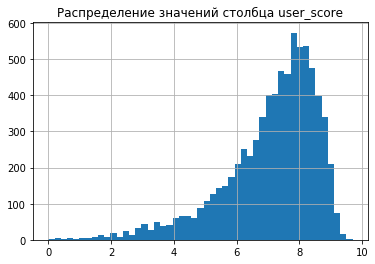

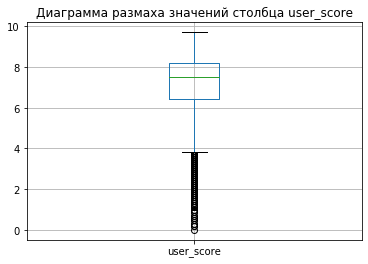

In [32]:
column_details(data, 'user_score', 49, 5)

Много пропусков, которые придётся оставить (нет возможности их как-либо восстановить). Скорее всего, пользователи далеко не всегда оставляют свою оценку, и оценка пользователей известна только для достаточно популярных игр.  
Распределение скошено влево. Так же, как и критики, пользователи либо склонны оценивать игры высоко, либо оченивать только хорошие игры (скорее второе). Но и плохие оценки тоже есть.  

### Информация о столбце "Рейтинг"

In [33]:
column_details(data, 'rating', 50, 9)

Изучение данных в столбце rating

Тип данных:               object
Пропущенных значений:     9140
Пропущенных значений:     0.5468142387077475
Повторяющихся значений:   16706
Уникальных значений:      9

Уникальные значения:
T       2581
E       2415
M       1521
E10+    1050
RP         3
K-A        3
AO         1
EC         1
Name: rating, dtype: int64


Это неожиданно: данные в столбце `rating` оказались текстовыми, их нужно расшифровать. Будет удобнее заменить их на более понятные текстовые значения (расшифровка взята из википедии).  

Создадим словарь значений рейтинга.

In [34]:
rating_short = data['rating'].dropna().unique()
print(rating_short)

['E' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


C первыми четырьмя значениями всё понятно, это "для всех", "для взрослых", "подросткам" и "старше 10 лет".  
А с последней четвёркой сложнее.  
- "K-A" - расшифровывается как "Kids to Adults". Это устаревший рейтинг, который в 1998 году был переименован в "E" (для всех). Так как здесь всего три строки, мы сразу объединим эту категорию с "E".  
- "RP" - «Rating Pending» - заменим на NA.
- "AO" - «Adults Only 18+» - только для взрослых. Игра с таким рейтингом всего одна, её можно объединить с категорией "M" (для взрослых).  
- "EC" - «Early childhood» - для детей младшего возраста: это игры для детей от трёх лет. Игра с таким рейтингом тоже только одна, из-за специфики категории (совсем маленькие дети) вряд ли можно объединить её с какой-то другой категорией, поэтому заменим её на NA.

In [35]:
rating_decryption = ['everyone', 'mature', 'teen', '10 and older', 'everyone', 'mature', np.nan, np.nan]
rating_dict = pd.DataFrame(
    {
        'rating': rating_short,
        'rating_decryption': rating_decryption
    }
)

display(rating_dict)

,rating,rating_decryption
0,E,everyone
1,M,mature
2,T,teen
3,E10+,10 and older
4,K-A,everyone
5,AO,mature
6,EC,NaN
7,RP,NaN


Добавим в таблицу `data` столбец `rating_decryption` и сделаем проверку.

In [36]:
data = data.merge(rating_dict, on='rating', how='left')
data.groupby('rating_decryption')['rating'].value_counts()

rating_decryption  rating
10 and older       E10+      1050
everyone           E         2415
                   K-A          3
mature             M         1521
                   AO           1
teen               T         2581
Name: rating, dtype: int64

Удалим столбец `rating` и переименуем столбец `rating_decryption`.

In [37]:
data = data.drop('rating', axis=1)
data = data.rename(columns = {'rating_decryption' : 'rating'})
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [38]:
data['rating'] = data['rating'].fillna('undefined')
data.groupby('rating')['rating'].value_counts()

rating        rating      
10 and older  10 and older    1050
everyone      everyone        2418
mature        mature          1522
teen          teen            2581
undefined     undefined       9144
Name: rating, dtype: int64

Столбец `rating` подготовлен.

### Расчёт суммарных продаж  игры по всем регионам
Добавляем столбец `total_sales`, суммируя все продажи в регионах.

In [39]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

Применяем к столбцу `total_sales` функцию `column_details`.

Изучение данных в столбце year_of_release

Тип данных:               float64
Пропущенных значений:     2618
Пропущенных значений:     0.15662578522285373
Повторяющихся значений:   16677
Уникальных значений:      38

Описательная статистика

count    14097.000000
mean      2006.286444
std          6.231017
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64



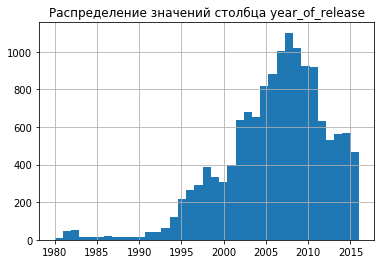

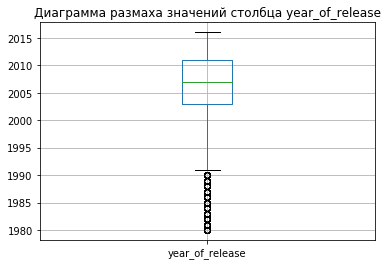

In [40]:
column_details(data, 'year_of_release', 37, 9)

### Вывод
Данные подготовлены к работе:
- данные приведены к нужным типам и проверены на наличие ошибок;
- данные проверены на наличие пропусков, там, где это возможно, пропуски заполнены;
- расчитано недостающее значение - суммарные продажи по всем регионам.



## Исследовательский анализ данных
### Количество выпущенных игр в разные годы

Ещё раз применим функцию `column_details` к столбцу `year_of_release`.

Изучение данных в столбце year_of_release

Тип данных:               float64
Пропущенных значений:     2618
Пропущенных значений:     0.15662578522285373
Повторяющихся значений:   16677
Уникальных значений:      38

Описательная статистика

count    14097.000000
mean      2006.286444
std          6.231017
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64



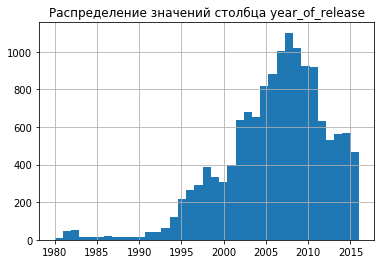

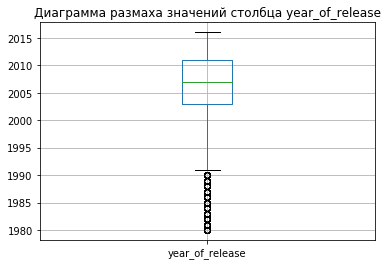

In [41]:
column_details(data, 'year_of_release', 37, 9)

До 1993 года выпускалось очень мало игр (около полусотни в год). Интересны для анализа данные начиная примерно с 1995 года и особенно после 2000, когда начинается бурное развитие игровой индустрии.

**Вывод**  
Показательными для анализа можно считать данные начиная с 1993 года.

### Выявление наиболее популярных платформ

Посмотрим на платформы с наибольшими суммарными продажами. Для этого выведем их в сводную таблицу и распечатаем частотную гистограмму:

,total_sales
platform,
PS2,1191.93
X360,958.84
PS3,929.40
Wii,807.14
PS,717.24
DS,657.00
PS4,314.00
PSP,277.12
GBA,265.92


,total_sales
count,31.000000
mean,272.890645
std,327.882750
min,0.030000
25%,23.360000
50%,200.040000
75%,271.520000
max,1191.930000


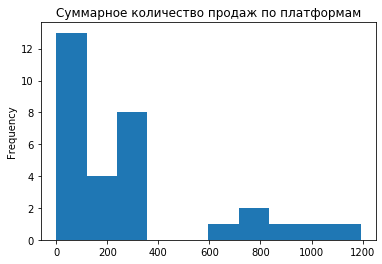

In [42]:
data_sales = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
)

display(data_sales.sort_values(by='total_sales', ascending=False).head(10))

display(data_sales.describe())
data_sales['total_sales'].plot(kind='hist', bins=10, title='Суммарное количество продаж по платформам')

Явно выделяется группа популярных платформ с более 500 миллионами продаж, это платформы: PS2, X360, PS3, Wii, PS и DS. Остальные идут от них с большим отрывом.  

**Вывод**  
Наиболее популярные платформы - с продажами более 500 миллионов: PS2, X360, PS3, Wii, PS и DS.

### Динамика продаж на наиболее популярных платформах

Построим для этих шести платформ распределение продаж по годам:

Динамика продаж на платформе DS
Суммарные продажи:  656.9999999999999
Платформа работает в актуальный период:   False 



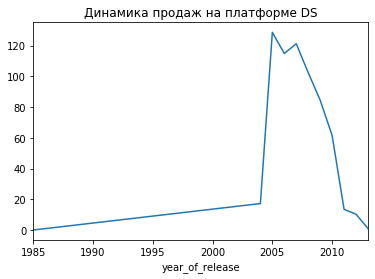

Динамика продаж на платформе PS
Суммарные продажи:  717.24
Платформа работает в актуальный период:   False 



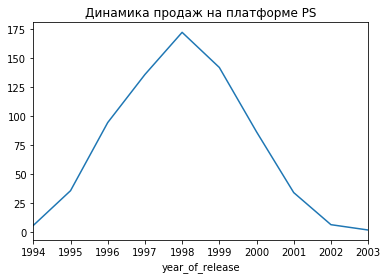

Динамика продаж на платформе PS2
Суммарные продажи:  1191.93
Платформа работает в актуальный период:   False 



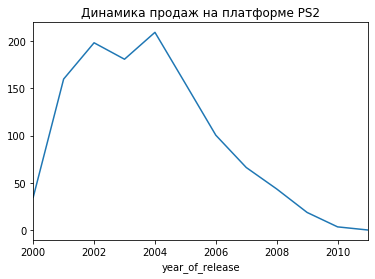

Динамика продаж на платформе PS3
Суммарные продажи:  929.4
Платформа работает в актуальный период:   True 



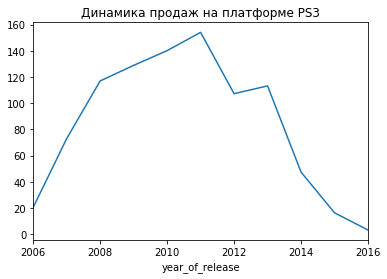

Динамика продаж на платформе Wii
Суммарные продажи:  807.14
Платформа работает в актуальный период:   False 



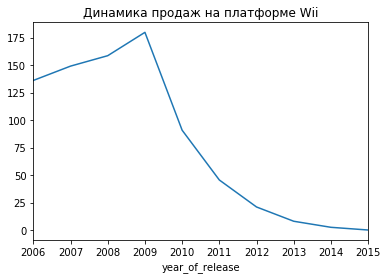

Динамика продаж на платформе X360
Суммарные продажи:  958.84
Платформа работает в актуальный период:   True 



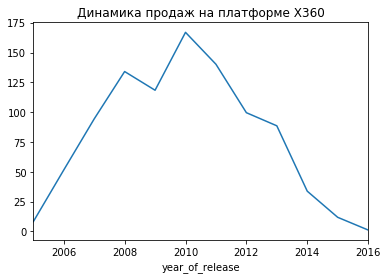

In [43]:
major_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']
for name, data_grouped in data.query('platform in @major_platforms').groupby('platform'):
    print(Color.BOLD + Color.BLUE + 'Динамика продаж на платформе ' + name + Color.END)
    print('Суммарные продажи: ', data_grouped['total_sales'].sum())
    print('Платформа работает в актуальный период: ', Color.RED, (data_grouped['year_of_release'].max() == 2016), Color.END)
    print()
    
    """Считаем продажи для платформы по годам:"""
    platform_years = data_grouped.pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    )
    
    title = 'Динамика продаж на платформе ' + name
    platform_years['total_sales'].plot(title=title)
    plt.show()

У крупных платформ пик продаж обычно приходится на первую половину или середину их жизни (кроме платформы DS). Это или примерно 2-6 год развития платформы или примерно 3-8, после этого продажи постепенно сходят на нет. Также нужно отметить, что среди рассмотренных платформ нет перспективных, так как даже у выпускавших игры в 2016 году наблюдается критичный спад в объёмах продаж.

**Вывод**  
Объём продаж у всех наиболее крупных платформ к моменту 2016 года идёт на спад, так что ни одну из них нельзя считать перспективной. Пик продаж у наиболее популярных платформ обычно приходится либо на начало (2-6 год), либо на середину жизни (3-8 год).

### Характерный срок жизни платформ

Определим характерный срок жизни платформ. В рамках предобработки данных у нас уже были подсчитаны годы существования платформ:

In [44]:
display(data_pivot_years_platform.sort_values(by='delta', ascending=False).head())

,min,max,delta
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0


count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: delta, dtype: float64

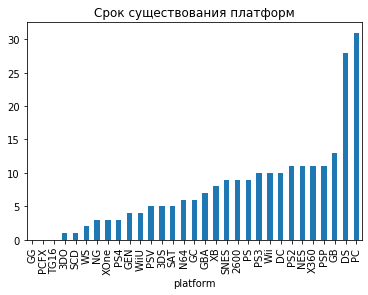

In [45]:
display(data_pivot_years_platform['delta'].describe())

data_pivot_years_platform['delta'].sort_values().plot(
    kind='bar', title='Срок существования платформ')
plt.show()

За всю историю было только две платформы-долгожителя: PC и DC (больше 25 лет). В среднем платформы живут около 6-8 лет, четверть платформ - около 10 лет.  

**Вывод**  
Большинство платформ ведёт активную деятельность примерно 6-8 лет. Около четверти платформ - 10 лет.

### Анализ рынка платформ в актуальный период
Если срок жизни платформ составляет примерно до 10 лет, а пик популярности выпускаемых игр приходится на время на период со второго по восьмой год, то в качестве актуального периода имеет смысл рассматривать последние 8 лет. Так мы увидим все актуальные тенденции (к росту или снижению продаж) и отсечём те платформы, которые уже утратили популярность.

Отберём те платформы, которые вели какую-то активную деятельность в последние 8 лет и при этом суммарный объём их больше медианного:

In [46]:
actual_platforms = []

data_sales = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
)

platform_sales_median = data_sales['total_sales'].median()

for name, data_grouped in data.groupby('platform'):
    year_max = data_grouped['year_of_release'].max()
    total_sales = data_grouped['total_sales'].sum()
    if year_max > 2008 and total_sales > platform_sales_median:
        actual_platforms.append(name)
        
print(actual_platforms)
print('Количество платформ: ', len(actual_platforms))

['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']
Количество платформ:  9


Мы получили 9 платформ, которые вели какую-то деятельность в течение актуального периода и могли бы представлять для нас интерес. Выведем их продажи за разные годы на графике:

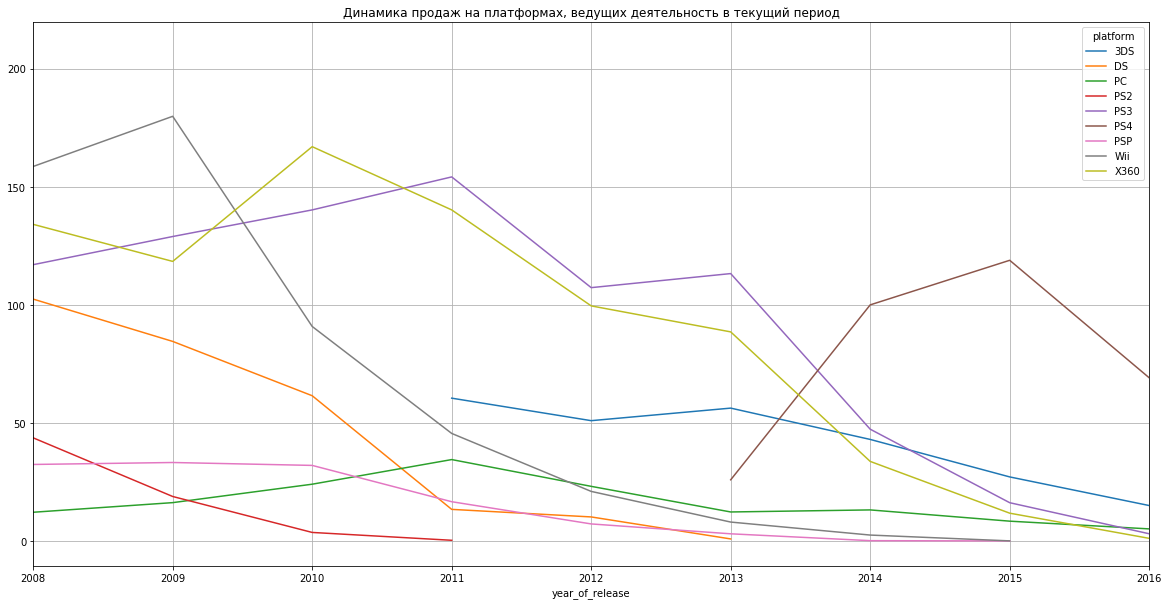

In [47]:
platform_years = data.query('platform in @actual_platforms').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

title = 'Динамика продаж на платформах, ведущих деятельность в текущий период'
platform_years.plot(title=title, xlim=(2008, 2016), figsize=(20, 10), grid=True)
plt.show()



По графику видно, что в последние годы популярность игровой индустрии падает: количество продаж снижается, не появляется новых такого масштаба, как раньше. Большая часть старых платформ в последние годы не выпускает популярных игр, продажи у некоторых из них к 2016 году сошли на нет, у многих - критично маленькие.  
в 2008-2011 годах лидерами рынка были платформы Wii, X360 и PS3, но к 2016 году их продуктивность существенно снизилась.
Наиболее перспективными выглядят две более молодые платформы: PS4, которая появилась в 2013 году и имеет самые высокие продажи в 2016 году, и 3DS, появившая в 2011 году. Продажи у неё постепенно снижаются и в 2016 году становятся совсем небольшими, но темп снижения меньше, чем у других платформ. 

**Вывод**  
В целом, судя по имеющимся данным, игровой рынок переживает спад. Старые популярные платформы снижают объёмы продаж, а настолько же популярных новых пока не возникает. Возможно, это связано с тем, что в данном исследовании не рассматриваются мобильные игры, которые перехватывают пользователей у более специализированных игровых платформ за счёт своей универсальности.  
Наиболее перспективной можно назвать в первую очередь относительно молодую платформу PS4. Сильно отстаёт от неё, но имеет не такой выраженный спад, как прочие, платформа 3DS.

### Сравнение продаж по самым популярным и перспективным платформам
Сравним суммарный объём продаж по играм для самых популярных платформ, добавим к списку также две платформы, которые мы посчитали потенциально перспективными.

In [48]:
major_platforms.append('3DS')
major_platforms.append('PS4')

print(major_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', '3DS', 'PS4']


In [49]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

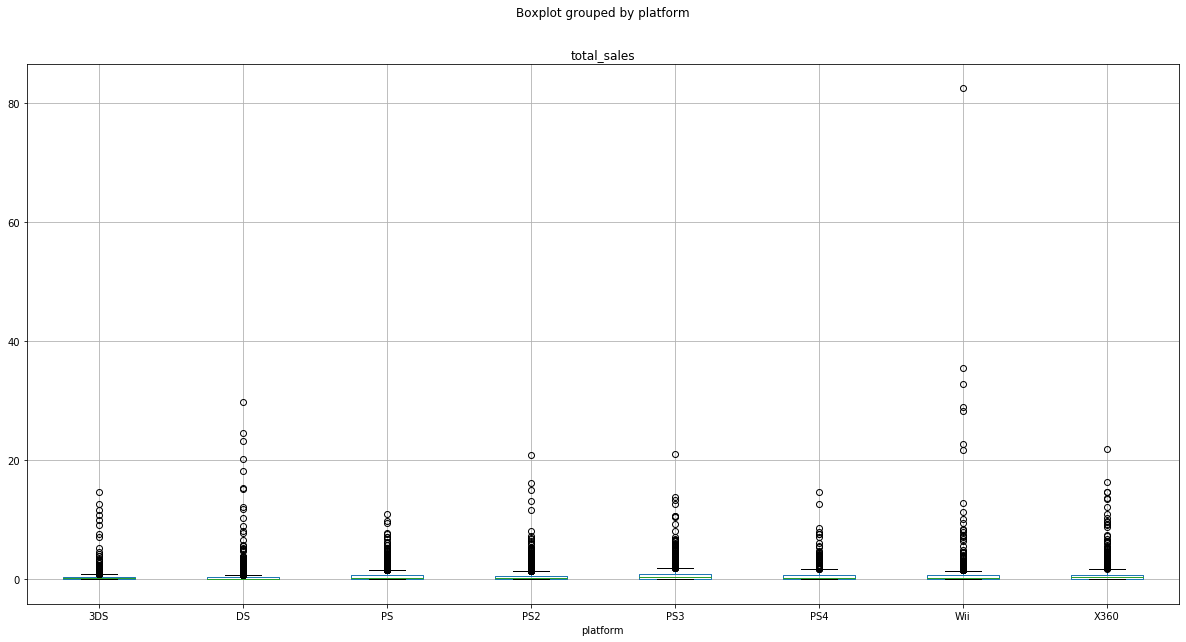

In [50]:
boxplot = data.query('platform in @major_platforms').boxplot(by='platform', column='total_sales', figsize=(20, 10))

plt.show()

In [51]:
total_sales_max = data['total_sales'].max()
display(data.loc[data.loc[:, 'total_sales'] == total_sales_max])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,everyone,82.54


Из-за неравномерности популярности игр мы видим "сплющенные" диаграммы. На этом варианте диаграммы мы видим те игры, которые имели наибольшее количество продаж. Безусловный лидер - это игра от Wii (та самая Wii Sports, самая популярная игра в Северной Америке и в Европе). Но у Wii есть и ещё ряд супер-популярных игр с продажами от 20 до 40 миллионов. Следующая платформа, которая выпускала супер-популярные игры - это DS, у неё тоже есть игры с 20-30 миллионами продаж.  
Теперь изменим размер оси "y" и посмотрим на сами "ящики":

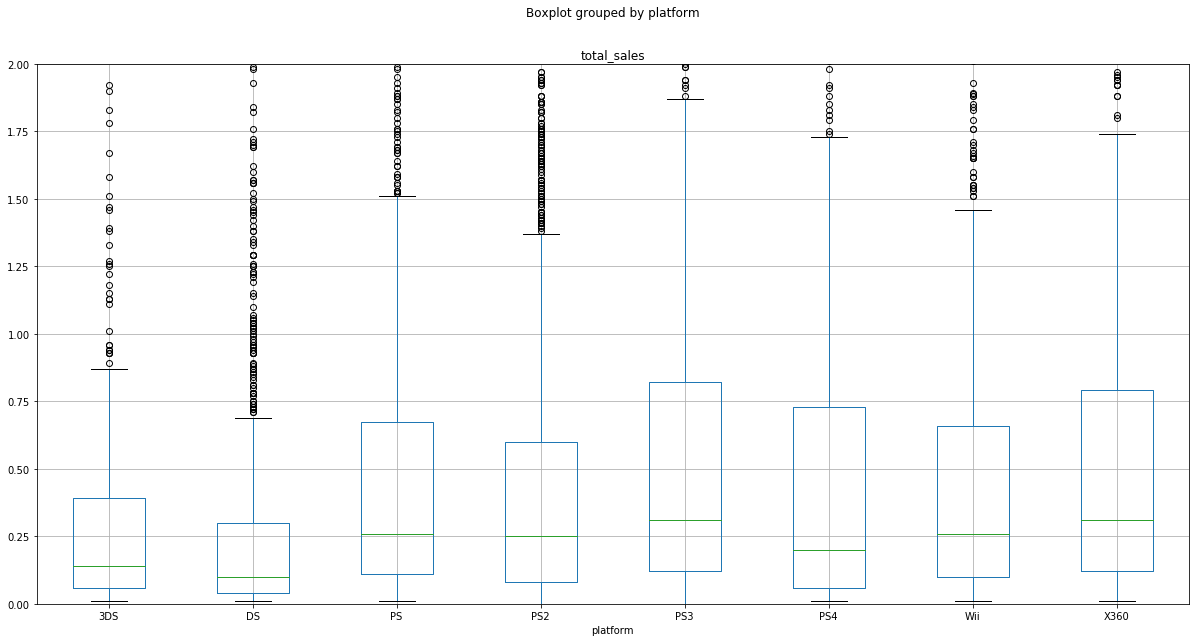

In [52]:
boxplot = data.query('platform in @major_platforms').boxplot(by='platform', column='total_sales', figsize=(20, 10))
plt.ylim(0, 2)
plt.show()

Кроме первых двух (3DS и DS) по форме распределения выбранные платформы не очень сильно отличаются друг от друга. Медианные значения колеблются вокруг 250 тысяч, то есть у каждой из этих платформ примерно половина игр имеет меньше четверти миилиона продаж, и примерно половина - больше.  
Разброс также отличается не очень сильно. На фоне остальных платформ даже немного выделяется интересующая нас PS4: правый "ус" у неё чуть длиннее, чем у других платформ, то есть популярные игры её производства в массе своей продаются несколько лучше, чем популярные игры других платформ, хотя таких шлягеров, как у Wii или DS у неё пока нет. Но так как PS4 относительно новая платформа, ей всего 4 года, есть шанс, что они ещё появятся.  
В правой части графика оказались отстающие (среди лидеров) платформы 3DS и DS. Их межквартильный размах меньше и сдвинут в нижнюю часть графика.  
Несмотря на несколько очень успешных игр (от 20 до 30 млн продаж) игры, выпущенные DS оказались менее продаваемыми, чем игры других лидеров рынка.  
Платформа 3DS выглядит чуть получше, но до лидеров рынка не дотягивает. Сложно строить о ней какие-то однозначные прогнозы. С одной стороны, она уже 6 лет на рынке, а её продажи с каждым годом постепенно снижаются. С другой стороны, характерный разброс продаж игр её произодства больше, чем у платформы DS, которую мы также отнесли к лидерам рынка по суммарному объёму продаж.

**Вывод**  
Характерный разброс объёма продаж (доля популярных и продаваемых игр и не очень популярных и продаваемых) игр платформы PS4 сопоставим с характерным разбросом наиболее популярных платформ прошлых лет, лидеров рынка. Относительно платформы 3DS сложно делать однозначные выводы: с одной стороны, характерный разброс объёма продаж игр её производства достаточно большой. С другой стороны, суммарные продажи падают в течение 6 лет, всего срока её жизни.

### Связь отзывов пользователей и критиков с продажами платформы PS4

Изучим, влияют ли отзывы пользователей и критиков на продажи внутри одной платформы на примере перспективной платформы PS4.  
Сделаем срез данных для платформы PS4 и построим матрицу корреляций и диаграммы рассеяния по столбцам `critic_score`, `user_score`, `total_sales`.

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406469
user_score,0.557654,1.000000,-0.031957
total_sales,0.406469,-0.031957,1.000000


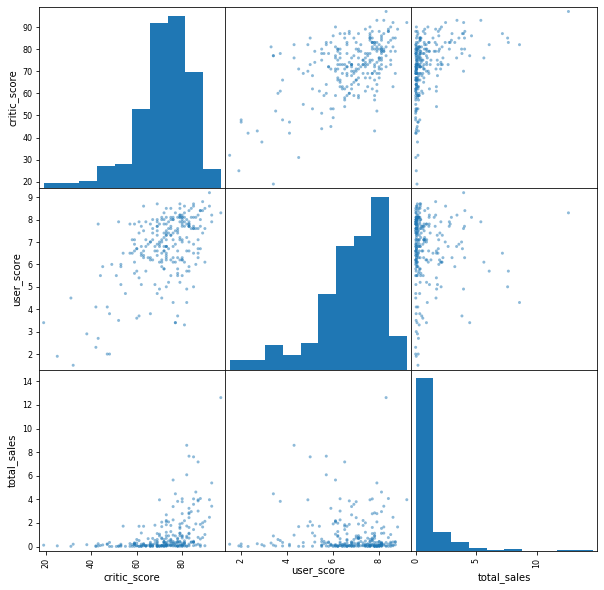

In [53]:
data_ps4 = data.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']]

pd.plotting.scatter_matrix(data_ps4, figsize=(10,10))
data_ps4.corr()

Отзывы пользователей и критиков связаны между собой (r=0.56). Продажи имеют слабо выраженную связь с отзывами критиков (r=0.40), но не связаны с отзывами пользователей (r=-0.03).  
По диаграммам рассеяния видно, что и пользователи, и критики оставляют очень много отзывов к играм с маленькими продажами. Возможно, это смазывает выраженность связи. Облако точек на диаграмме, иллюстрирующеё связь продаж и отзывов критиков более выпуктое, а на диаграмме продаж и отзывов пользователей - более хаотичное, что подтверждает отсутсвие связи.

**Вывод**  
В рамках наших данных по платформе PS4 отзывы пользователей и отзывы критиков положительно коррелируют между собой, однако только отзывы критиков положительно связаны с продажами. Связи продаж с отзывами пользователей по имеющимся данным выявить не удалось.  

### Связь отзывов пользователей и критиков с прадажами на других платформах

Посмотрим, как связаны продажи и отзывы на других платформах. Сграппируем данные по платформам (возьмём только крупные и актульные платформы из нашего списка `major_platforms`) и построим для них матрицу корреляций и диаграммы рассеяния:

Связь продаж и отзывов пользователей и критиков на платформе 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.744168,0.339824
user_score,0.744168,1.000000,0.224808
total_sales,0.339824,0.224808,1.000000


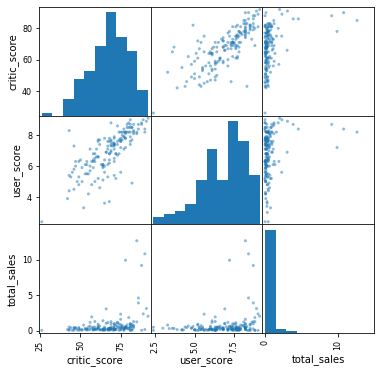

Связь продаж и отзывов пользователей и критиков на платформе DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.655516,0.231643
user_score,0.655516,1.000000,0.130436
total_sales,0.231643,0.130436,1.000000


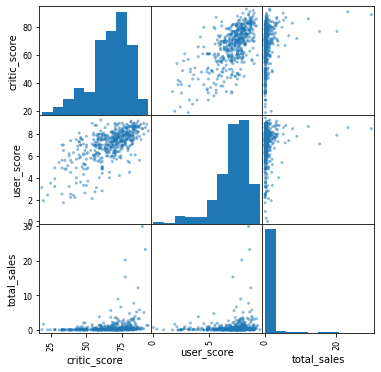

Связь продаж и отзывов пользователей и критиков на платформе PS


,critic_score,user_score,total_sales
critic_score,1.000000,0.692248,0.436804
user_score,0.692248,1.000000,0.297978
total_sales,0.436804,0.297978,1.000000


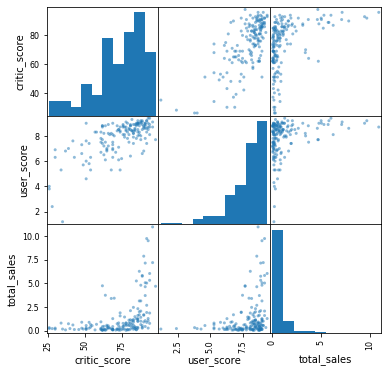

Связь продаж и отзывов пользователей и критиков на платформе PS2


,critic_score,user_score,total_sales
critic_score,1.000000,0.563254,0.389220
user_score,0.563254,1.000000,0.172866
total_sales,0.389220,0.172866,1.000000


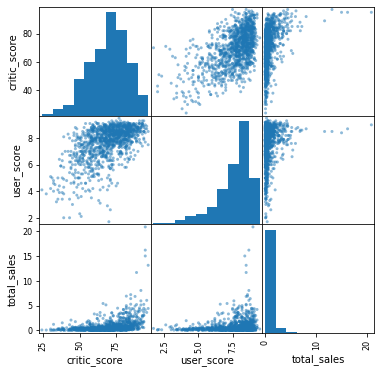

Связь продаж и отзывов пользователей и критиков на платформе PS3


,critic_score,user_score,total_sales
critic_score,1.000000,0.629005,0.428033
user_score,0.629005,1.000000,0.126691
total_sales,0.428033,0.126691,1.000000


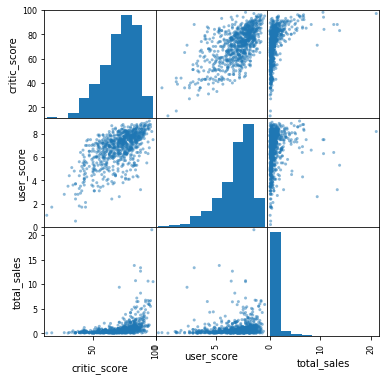

Связь продаж и отзывов пользователей и критиков на платформе PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406469
user_score,0.557654,1.000000,-0.031957
total_sales,0.406469,-0.031957,1.000000


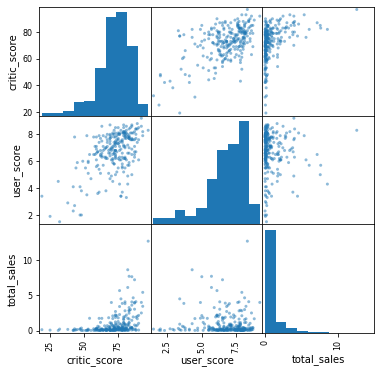

Связь продаж и отзывов пользователей и критиков на платформе Wii


,critic_score,user_score,total_sales
critic_score,1.000000,0.681846,0.169683
user_score,0.681846,1.000000,0.112414
total_sales,0.169683,0.112414,1.000000


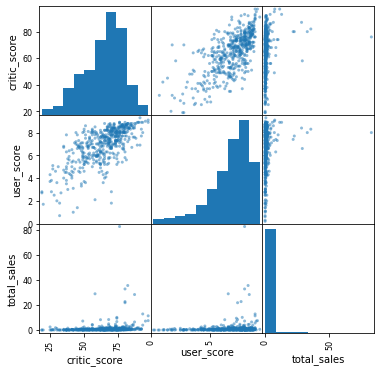

Связь продаж и отзывов пользователей и критиков на платформе X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.618101,0.390012
user_score,0.618101,1.000000,0.114459
total_sales,0.390012,0.114459,1.000000


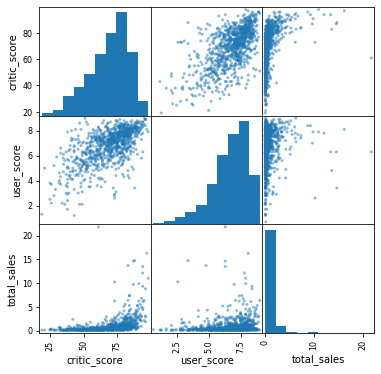

In [54]:
data_scores = data.query('platform in @major_platforms')[['platform', 'critic_score', 'user_score', 'total_sales']]
for name, data_grouped in data_scores.groupby('platform'):
    print(Color.BOLD + Color.BLUE + 'Связь продаж и отзывов пользователей и критиков на платформе ' + name + Color.END)
    display(data_grouped.corr())    
    pd.plotting.scatter_matrix(data_grouped, figsize=(6,6))
    plt.show()


Так же, как и для платформы PS4 у всех платформ подавляющее число точек на диаграммах рассения располагается рядом с осью оценок критиков и пользователей (количество продаж у этих игр очень небольшое). При этом критики практически никогда не свавят низкие оценки играм с большим объёмом продаж, а пользователи могут оценить игры с высокими продажами как высоко, так и не очень.  
Связь между оценками критиков и пользователей для всех платформ из нашего списка самой сильной оказалась (также, как и у платформы PS4). Есть небольшая корреляция между продажами и отзывами критиков, связь между продажами и отзывами пользователей практически отсутствует.  

**Вывод**  
Анализ данных по другим популярным платформам подтверждает выводы, сделанные для платформы PS4: отзывы критиков и пользователей довольно сильно коррелируют между собой, однако только отзывы критиков положительно связаны с продажами, и эта связь довольно слабая.  

### Распределение игр по жанрам

Проанализируем распределение игр по жанрам. Посмотрим, какие игры выпускают и продают больше всего и меньше всего при помощи сводной таблицы по жанрам.

In [55]:
genre_pivot = data.query('year_of_release > 2008').pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['count', 'sum', 'mean']
)

display(genre_pivot.sort_values(by=('sum', 'total_sales'), ascending=False))

,count,sum,mean
,total_sales,total_sales,total_sales
genre,,,
action,1583,777.61,0.491226
shooter,466,546.28,1.172275
sports,592,425.81,0.719274
role-playing,662,361.30,0.545770
misc,527,257.28,0.488197
platform,153,155.22,1.014510
racing,252,146.08,0.579683
fighting,242,112.19,0.463595


Сразу бросается в глаза, что количество выпущенных игр не всегда напрямую связано с долей продаж игр в этом жанре.  
По количеству выпущенных игр и по количеству продаж однозначно лидирует жанр Action, однако в этом жанре в среднем приходится всего около полумиллиона продаж. Игр в жанре shooter выпущено гораздо меньше, но среди них на каждую игру приходится в среднем около миллиона продаж.    

**Больше всего выпускается** игр за последние 8 лет в жанрах: Action, Role-playing, Adventure, Sports и Misc.    
В абсолютных значениях **больше всего продаж** приходится на жанры: Action, Shooter, Sports, Role-playing, Misc.  
**В среднем больше продаж** приходится на жанры: Shooter, Platform, Sports, Racing, Role-playing. 

Меньше всего выпускается игр в жанрах: Puzzle, Platform, Simulation, Strategy, Fighting. 
В абсолютных значениях меньше всего продаж приходится на жанры: Puzzle, Strategy, Adventure, Simulation, Fighting.
В среднем меньше всего продаж приходится на жанры: Adventure, Strategy, Puzzle, Simulation, Fighting.

Есть жанры, в которых выпускается очень много игр, а продаётся - очень мало (например, Adventure), то есть эти два параметра (количество выпускаемых игр и средняя доля продаж на каждую выпущенную игру) нужно рассматривать в комплексе.  

В жанре Action больше всего абсолютное количество продаж, но не такое уж большое число продаж в пересчёте на каждую выпущенную игры. Можно сказать, что игр в этом рынок жанре "перенасыщен".  
Самыми перспективными выглядят жанры Shooter, Sports и Role-playing. В них много игр и выпускается, и продаётся.  
Мало выпускается и мало продаётся игр жанра Puzzle, Platform, Simulation и Strategy.  
Самые непереспективные игры - жанра Adventure, их выпускается очен много, а продаётся очень мало


**Вывод**  
При анализе популярности жанра нужно учитывать не только абсолютное количество проданных игр, но и среднее количество продаж на каждую выпущенню игру. Наиболее популярными на момент исследования (2016г) являются жанры: Shooter, Sports и Role-playing.  
В жанре Adventure выпускается очень много игр, но продажи очень низние.  
В жанре Action лидирует по абсолютному количеству продаж. Однако в этом жанре выпускается намного больше игр, чем в других жанрах, так что средняя доля продаж на одну игру оказывается невысокой.  
Меньше всего выпускается и продаётся игр в жанрах: Puzzle, Platform, Simulation и Strategy.

## Портрет пользователей из разных регионов (NA, EU, JP).

Выясним, какие предпочтения есть у пользователей из разных регионов. Выведем в сводной таблице данные по платформам для разных регионов.

In [56]:
users_pivot = data.query('year_of_release > 2008').pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum'
)

display(users_pivot.head())

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,59.77,100.39,80.13,12.95
DS,37.80,51.00,71.32,10.71
PC,81.43,0.00,40.23,15.91
PS2,3.95,2.74,7.22,9.14
PS3,253.22,67.92,286.96,102.53


В таком виде данные не очень удобно сравнивать. Отформатируем столбцы так, чтобы данные о продажах на разных платформах отображались по каждому региону в процентах, применим для этого функцию `to_percent`.

In [57]:
def to_percent(data):
    """Функция перевод"""
    for c_name in data.columns:
        summ = data[c_name].sum()
        data[c_name] = data[c_name] / summ
        
    data_style = data.style.format('{:.2%}')   
    return data_style


display(to_percent(users_pivot))

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,6.06%,27.52%,6.02%,4.02%
DS,3.83%,13.98%,5.36%,3.32%
PC,8.25%,0.00%,3.02%,4.94%
PS2,0.40%,0.75%,0.54%,2.84%
PS3,25.66%,18.62%,21.56%,31.81%
PS4,14.30%,4.38%,8.16%,14.99%
PSP,1.62%,13.74%,1.31%,2.91%
PSV,1.31%,5.96%,0.94%,1.98%
Wii,11.02%,9.37%,13.23%,9.07%


В Европе, Северной Америке и других регионах пользователи предпочитают игры платформ PS3 и X360, в Японии - 3DS и PS3. 

Выведем сводную таблицу для регионов по жанрам:

In [58]:
users_pivot_genre = data.query('year_of_release > 2008').pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc=['sum']
)

display(to_percent(users_pivot_genre))

В Европе, Северной Америке и других регионах больше всего покупают игры жанра Action, Shooter и Sports, а в Японии предпочитают Role-playing и Action.

In [59]:
users_pivot_ratings = data.query('year_of_release > 2008').pivot_table(
    index='rating',
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    aggfunc='sum'
)

display(to_percent(users_pivot_ratings))

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
10 and older,11.36%,5.65%,13.47%,11.43%
everyone,23.78%,16.61%,23.44%,22.56%
mature,33.06%,9.77%,33.05%,34.18%
teen,15.05%,13.56%,15.82%,16.47%
undefined,16.76%,54.42%,14.23%,15.36%


**Старая аналилитика**  

У пользователей из Европы, Северной Америки и других регионов схожие предпочтения по рейтингу игр. На первом месте по популярности взрослые игры (33-34% продаж), затем игры для всех (22-24%), игры для подростков (15-16%) и детские игры (11-13%). Не известен рейтинг у 14-16% игр.  
В Японии гораздео больше, чем в других регионах играют в игры без рейтинга (или с неизвестным рейтингом - 54% проданных игр). На игры для всех приходится всего 16.61% купленных игр, на игры для подростков - 13.56%, а игры для взрослых и детские - 9,77% и 5,65%.  
    Сложно сказать, связано ли это различие с тем, что пользователи из Японии обращают меньше внимания на рейтинг, или наоборот больше обращают внимание на какой-то другой неизвестный нам фактор (например локальные рейтинги). Например, возможно, пользователи из Японии больше доверяют локальным платформам (мы знаем, что в Японии, в отличиче от других регионов, более популярна платформа 3DS).  
      
      
**Вывод**  
    Предпочтения у пользователей из Европы, Северной Америки и других регионах очень близки: они чаще выбирают игры на платформах PS3 и X360, наиболее популярные жанры: Action, Shooter и Sports, наиболее востребованные возрастные рейтинги - игры для взрослых и игры для всех.  
    Предпочтения пользователей из Японии сильно отличаются. Они чаще выбирают платформы 3DS и PS3, игры жанра Role-playing и Action. Более половины игр, купленных в Японии, не имеют возрастного рейтинга. Это может быть связано с разными причинами, но кажется, что японские пользователи склонны ориентироваться на другие критерии выбора игр, не попавшие в зону нашего рассмотрения (например, локальные рейтинги или что-то подобное).

In [60]:
users_pivot_ratings = data.query('year_of_release > 2008').pivot_table(
    index='platform',
    columns='rating',
    values=['total_sales'],
    aggfunc='sum'
)

display(to_percent(users_pivot_ratings))

## Проверка гипотез

###  Проверка гипотезы о равенстве пользовательских рейтингов платформ
**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Для проверки гипотез используем функцию  для сравнения зредних значений двух генеральных совокупностей `ttest_for_two_samples`. Функция выводит описательную статистику, проверяет нулевую гипотезу о равенстве средних двух генеральных совокупностей и строит частотные гистограммы и диаграммы размаха.

In [61]:
def ttest_for_two_samples(data1, group, column1, condition1, data2, column2, condition2, alpha, equal_var, title):
    """Функция применяет t-test к двум массивам данных и строит частотную гистограмму и диаграмму рассеяния.
    В качестве аргументов принимает:
    data1 - первая таблица, 
    group - столбец, по которому делается группировка, 
    column1 - столбец с анализируемыми данными в первой таблице, 
    condition1 - основание для выбора данных из первой таблицы, 
    data2 - вторая таблица, 
    column2 - столбец с анализируемыми данными во второй таблице, 
    condition2 - основание для выбора данных из второй таблицы, 
    alpha - значение alpha, 
    equal_var - True/False, 
    title - заголовок
    
    """
    """Создаём библиотеку стилей"""
    class Color:
        PURPLE = '\033[95m'
        CYAN = '\033[96m'
        DARKCYAN = '\033[36m'
        BLUE = '\033[94m'
        GREEN = '\033[92m'
        YELLOW = '\033[93m'
        RED = '\033[91m'
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
    
    """Печатаем заголовок"""
    head = 'Проверка гипотезы H₀ о равенстве генеральных совокупностей ' + title
    print(Color.BOLD + Color.BLUE + head + Color.END)
    
    """Выводим описательную статистику по столбцу col для каждой из групп"""
    print()
    print(Color.BOLD + Color.BLUE + 'Описательная статистика' + Color.END)
    print()
    
    sample_1 = data1.loc[data1.loc[:, group] == condition1][column1].dropna()
    sample_2 = data2.loc[data2.loc[:, group] == condition2][column2].dropna()      
    
    stat1 =  data1.loc[data1.loc[:, group] == condition1][column1].describe()
    stat2 =  data2.loc[data2.loc[:, group] == condition2][column2].describe()

    stats = pd.DataFrame(
        {
            condition1: stat1, condition2: stat2
        }
    )
    
    display(stats)
    print()

    """Проверка гипотезы о равенстве средних"""
    alpha = alpha  
    results = st.ttest_ind(sample_2, sample_1, equal_var=equal_var)
    print('H₀: средние двух генеральных совокупностей равны между собой')
    print('H₁: средние двух генеральных совокупностей не равны между собой')
    print()
    
    """"""
    if pd.isna(results.pvalue):
        print(Color.RED + 'Нужно проверить данные на наличие ошибок, pvalue = nan' + Color.END)
    else:
        print(Color.GREEN, 'p-значение:', results.pvalue, Color.END)
        if results.pvalue < alpha:
            print(Color.RED + Color.BOLD + 'Отвергаем нулевую гипотезу' + Color.END)
        else:
            print(Color.GREEN, 'Не получилось отвергнуть нулевую гипотезу', Color.END)
            
    """Строим частотные гистограммы"""
    ax = sample_1.plot(kind='hist', bins=20, alpha=0.5, legend=True)
    sample_2.plot(kind='hist', bins=20, alpha=0.5, legend=True, title=('Сравнение распределений двух выборок'))
    ax.legend([condition1, condition2])
    plt.show()    
    
    """Строим диаграммы размаха"""
    boxplot_data = data1.loc[data1.loc[:, group] == condition1][[group, column1]].append(
        data2.loc[data2.loc[:, group] == condition2][[group, column2]])
    
    ax.boxplot = boxplot_data.boxplot(by=group, column=column1)
    plt.title('Распределение ' + condition1 + ' и ' + condition2)
    ax.set_title('Распределение ')
    plt.show()

При помощи функции `ttest_for_two_samples` проверим гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC.

Проверка гипотезы H₀ о равенстве генеральных совокупностей пользовательских рейтингов платформ Xbox One и PC

Описательная статистика



,XOne,PC
count,182.000000,770.000000
mean,6.521429,7.062468
std,1.380941,1.529963
min,1.600000,1.400000
25%,5.800000,6.200000
50%,6.800000,7.500000
75%,7.500000,8.200000
max,9.200000,9.300000



H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой

 p-значение: 4.935072360183565e-06 
Отвергаем нулевую гипотезу


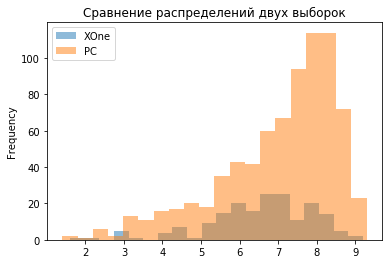

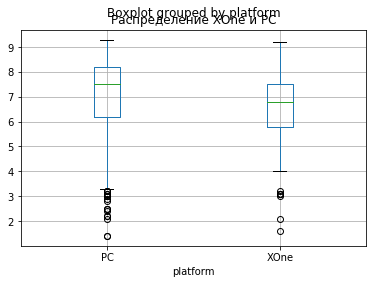

In [62]:
ttest_for_two_samples(
    data, 'platform', 'user_score', 'XOne', data, 'user_score', 'PC', 0.01
    , False, 'пользовательских рейтингов платформ Xbox One и PC')

Нулевая гипотеза отвергнута: с высокой степенью значимости пользовательские рейтинги платформ Xbox One и PC не равны между собой, хотя разница не очень большая, пользовательские рейтинги платформы PC немного выше (средние пользовательские рейтинги у Xbox One 6,5 баллов, а у PC - 7 баллов).

**Вывод**  
Исследовательская гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC была отвергнута. Cредние пользовательские рейтинги у Xbox One  ниже, чем у PC (6,5 баллов против 7 баллов).

### Проверка исследовательской гипотезы о различиях средних пользовательских рейтинги жанров Action и Sports
**Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**  

Проверим гипотезу при помощи функции `ttest_for_two_samples`. 

Проверка гипотезы H₀ о равенстве генеральных совокупностей пользовательских рейтингов жанров Action и Sports

Описательная статистика



,action,sports
count,1830.000000,1103.000000
mean,7.054044,6.961197
std,1.425394,1.611370
min,0.300000,0.200000
25%,6.300000,6.100000
50%,7.400000,7.400000
75%,8.100000,8.100000
max,9.500000,9.500000



H₀: средние двух генеральных совокупностей равны между собой
H₁: средние двух генеральных совокупностей не равны между собой

 p-значение: 0.11483818791498286 
 Не получилось отвергнуть нулевую гипотезу 


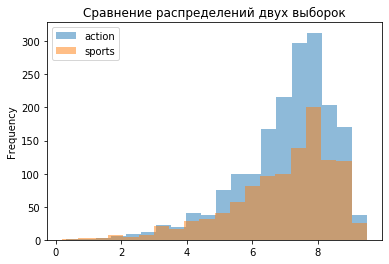

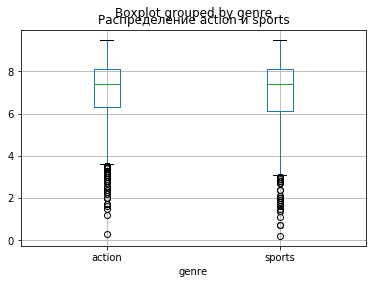

In [63]:
ttest_for_two_samples(
    data, 'genre', 'user_score', 'action', data, 'user_score', 'sports', 0.01
    , False, 'пользовательских рейтингов жанров Action и Sports')

Нулевую гипотезу отвергнуть не удалось: с вероятностью 11% средние двух генеральных совокупностей равны.  

**Вывод**
Достаточных оснований, чтобы сделать вывод о том, что пользовательские рейтинги жанров Action и Sports различаются, нет.

## Общие выводы


### Краткий обзор проведённой работы

Данные подготовлены к работе. Проанализированы данные по столбцам, построены гистограммы, данные проверены на наличие ошибок, заполнены пропуски. Изменён тип данных столбцов в тех случаях, где он не соответствовал цели. Данные проверены на наличие дублирующихся строк.

Рассчитаны и добавлены в таблицу суммарные продажи по всем регионам.

Проведён исследовательский анализ данных. Проанализировано количество игр в разные годы, выделены наиболее популярные платформы и характерный срок жизни платформ. Найдены потенциально прибыльные в актуальном периде платформы, проанализирован характерный объём их объёма продаж по сравнению с наиболее популярными платформами прошлого периода. Проанализирована связь продаж с отзывами критиков и пользователей. Проанализирована популярность разных жанров. Составлены портреты пользователей из разных регионов и их предпочтений. Проверены гипотезы.  

### Выводы 

**Количество игр, выпускаемых в разные годы**  
Показательными для анализа можно считать данные начиная с 1993 года.  

**Наиболее популярные платформы за всё время**  
Наиболее популярные платформы - с продажами более 500 миллионов: PS2, X360, PS3, Wii, PS и DS. Объём продаж у всех наиболее крупных платформ к моменту 2016 года идёт на спад, так что ни одну из них нельзя считать перспективной.  

**Характерное время жизни платформ**  
Пик продаж у наиболее популярных платформ обычно приходится либо на начало (2-6 год), либо на середину жизни (3-8 год).
Большинство платформ ведёт активную деятельность примерно 6-8 лет. Около четверти платформ - 10 лет.  

**Потенциально прибыльные платформы в актуальный период**  
В целом, судя по имеющимся данным, игровой рынок переживает спад. Старые популярные платформы снижают объёмы продаж, а настолько же популярных новых пока не возникает. Возможно, это связано с тем, что в данном исследовании не рассматриваются мобильные игры, которые перехватывают пользователей у более специализированных игровых платформ за счёт своей универсальности.
Наиболее перспективной можно назвать в первую очередь относительно молодую платформу PS4. Сильно отстаёт от неё, но имеет не такой выраженный спад, как прочие, платформа 3DS.  

**Характерный разброс объёма продаж потенциально прибыльных платформ по сравнению с наиболее популярными платформами за всё время**  
Характерный разброс объёма продаж (доля популярных и продаваемых игр и не очень популярных и продаваемых) игр платформы PS4 сопоставим с характерным разбросом наиболее популярных платформ прошлых лет, лидеров рынка. Относительно платформы 3DS сложно делать однозначные выводы: с одной стороны, характерный разброс объёма продаж игр её производства достаточно большой. С другой стороны, суммарные продажи падают в течение 6 лет, всего срока её жизни.  

**Связь продаж и отзывов пользователей и критиков для платформы PS4**  
В рамках наших данных по платформе PS4 отзывы пользователей и отзывы критиков положительно коррелируют между собой, однако только отзывы критиков положительно связаны с продажами. Связи продаж с отзывами пользователей по имеющимся данным выявить не удалось.  

**Связь продаж и отзывов пользователей и критиков для других платформ**  
Анализ данных по другим популярным платформам подтверждает выводы, сделанные для платформы PS4: отзывы критиков и пользователей довольно сильно коррелируют между собой, однако только отзывы критиков положительно связаны с продажами, и эта связь довольно слабая.  

**Анализ популярности жанров**  
При анализе популярности жанра нужно учитывать не только абсолютное количество проданных игр, но и среднее количество продаж на каждую выпущенню игру. Наиболее популярными на момент исследования (2016г) являются жанры: Shooter, Sports и Role-playing.  
В жанре Adventure выпускается очень много игр, но продажи очень низние.  
В жанре Action лидирует по абсолютному количеству продаж. Однако в этом жанре выпускается намного больше игр, чем в других жанрах, так что средняя доля продаж на одну игру оказывается невысокой.  
Меньше всего выпускается и продаётся игр в жанрах: Puzzle, Platform, Simulation и Strategy.

**Портреты пользователей регионов (NA, EU, JP)**  
Предпочтения у пользователей из Европы, Северной Америки и других регионах очень близки: они чаще выбирают игры на платформах PS3 и X360, наиболее популярные жанры: Action, Shooter и Sports, наиболее востребованные возрастные рейтинги - игры для взрослых и игры для всех.
Предпочтения пользователей из Японии сильно отличаются. Они чаще выбирают платформы 3DS и PS3, игры жанра Role-playing и Action. Более половины игр, купленных в Японии, не имеют возрастного рейтинга. Это может быть связано с разными причинами, но кажется, что японские пользователи склонны больше ориентироваться на другие, не попавшие в зону нашего рассмотрения, критерии выбора игр (например, локальные рейтинги или что-то подобное).

**Проверка гипотез**
Исследовательская гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC была отвергнута. Cредние пользовательские рейтинги у Xbox One  ниже, чем у PC (6,5 баллов против 7 баллов).
Достаточных оснований, чтобы сделать вывод о том, что пользовательские рейтинги жанров Action и Sports различаются, нет.